In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
df = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

In [22]:
df.columns = df.columns.str.strip()


In [23]:
# Step 4: Display basic info
print("Columns in dataset:", df.columns)
print("\nFirst few rows of the dataset:\n")
print(df.head())


Columns in dataset: Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

First few rows of the dataset:

           Region         Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020         M                             5.48   
1  Andhra Pradesh   29-02-2020         M                             5.83   
2  Andhra Pradesh   31-03-2020         M                             5.79   
3  Andhra Pradesh   30-04-2020         M                            20.51   
4  Andhra Pradesh   31-05-2020         M                            17.43   

   Estimated Employed  Estimated Labour Participation Rate (%) Region.1  \
0            16635535                                    41.02    South   
1            16545652                                    40.90    South   
2            15881197                          

In [24]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [25]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

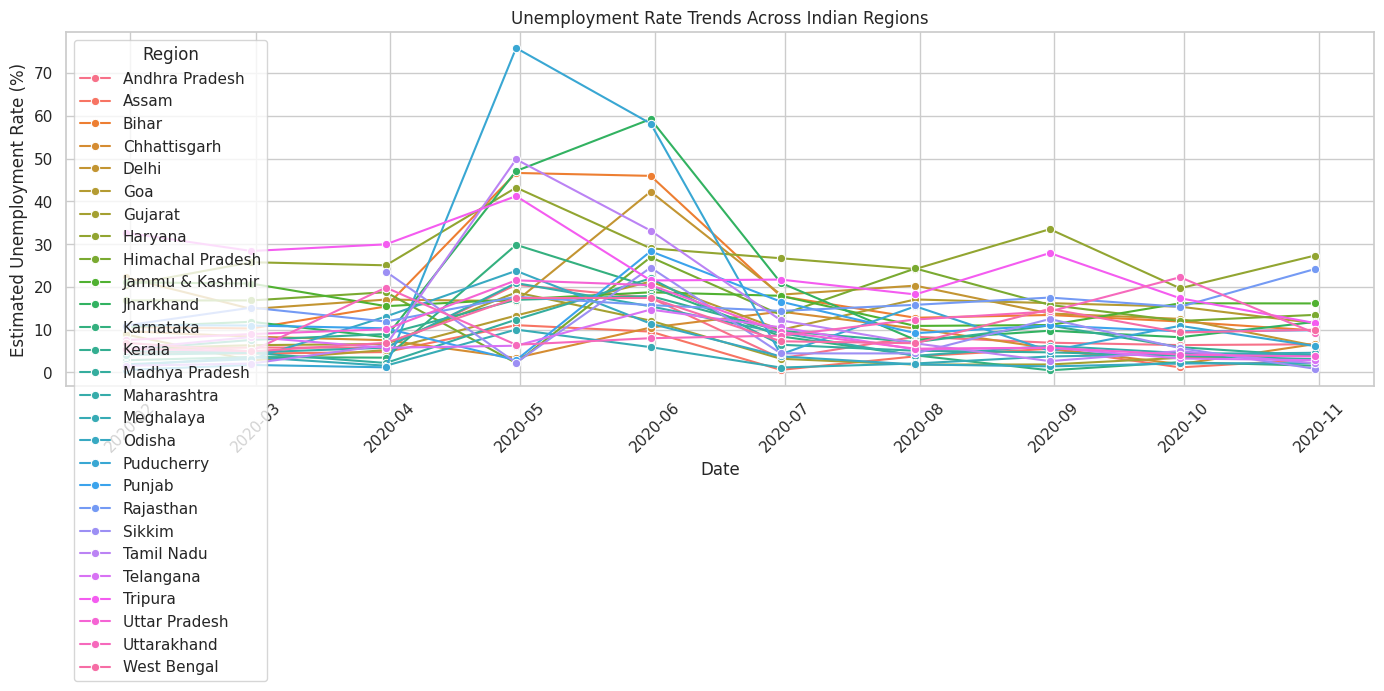

In [26]:
# Step 7: Lineplot of unemployment over time by region
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Region', marker='o')
plt.title('Unemployment Rate Trends Across Indian Regions')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# Step 8: Focus on COVID-19 period (2020)
covid_df = df[df['Year'] == 2020]

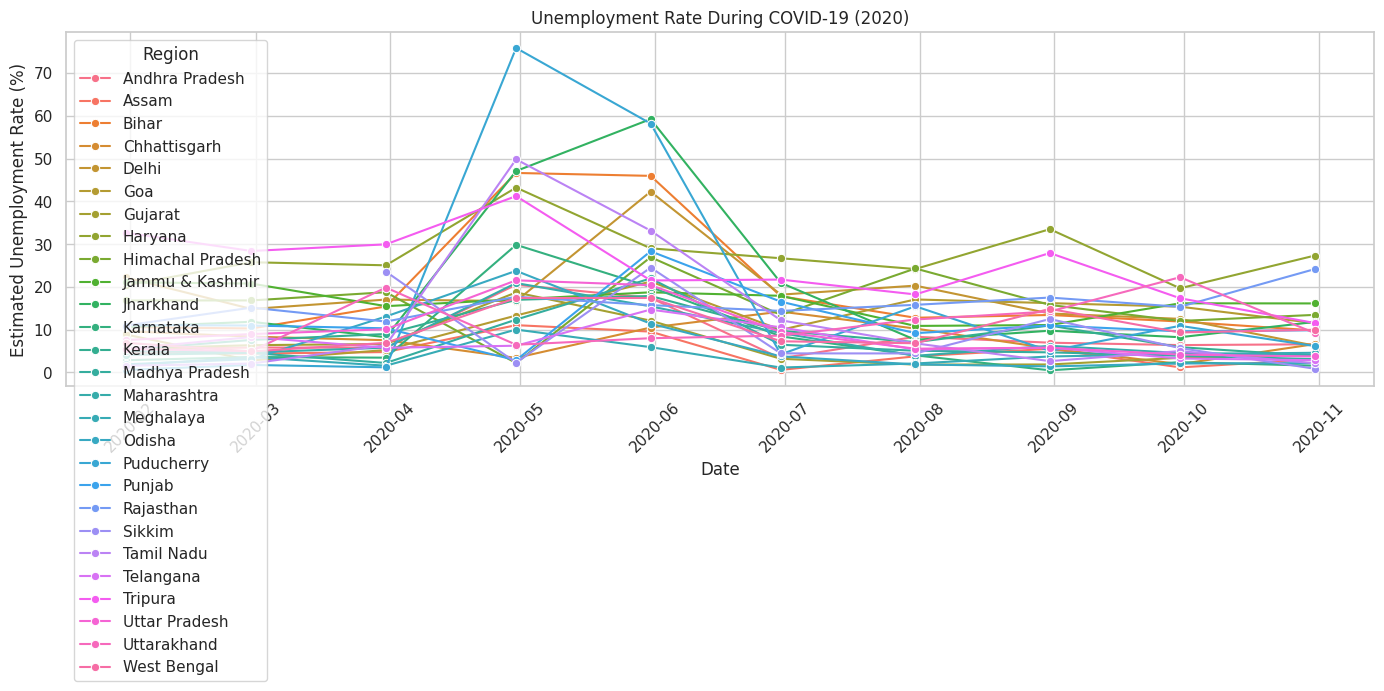

In [28]:

plt.figure(figsize=(14, 6))
sns.lineplot(data=covid_df, x='Date', y='Estimated Unemployment Rate (%)', hue='Region', marker='o')
plt.title('Unemployment Rate During COVID-19 (2020)')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
monthly_avg = df.groupby('Month')['Estimated Unemployment Rate (%)'].mean()


<ipython-input-30-4287929755>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="Blues_d")


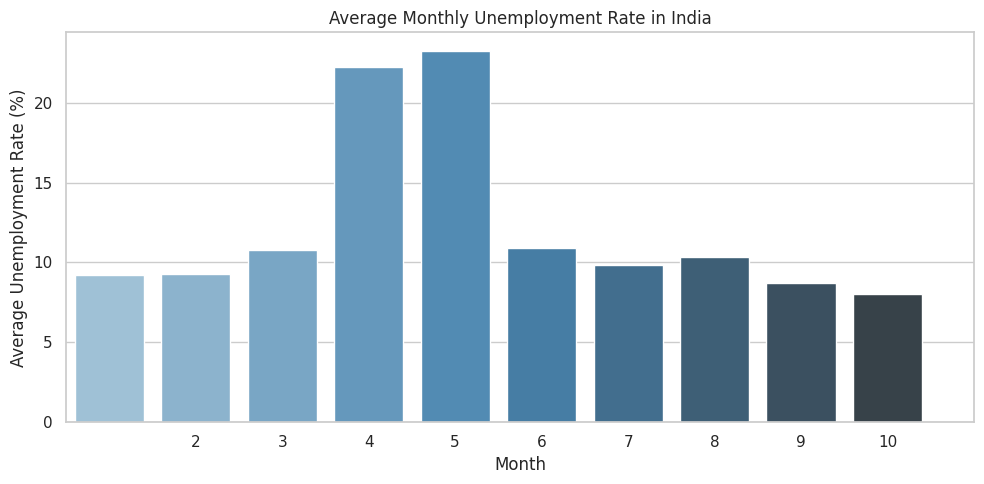

In [30]:

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="Blues_d")
plt.title('Average Monthly Unemployment Rate in India')
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(monthly_avg.index)
plt.tight_layout()
plt.show()


In [31]:
# Step 10: Region-wise average unemployment rate
region_avg = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values()


<ipython-input-32-7347471>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.values, y=region_avg.index, palette='coolwarm')


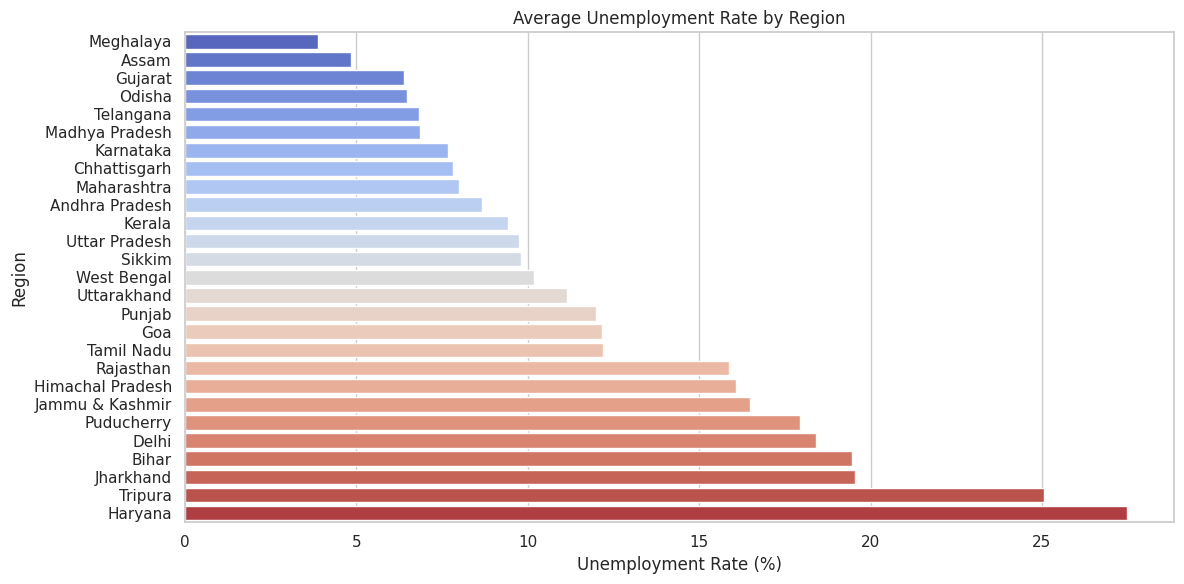

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x=region_avg.values, y=region_avg.index, palette='coolwarm')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()